# Example4 - Multisetup with Pre Global Estimation Re-scaling (PreGER) method

In [6]:
import os
import sys
# Add the directory we executed the script from to path:
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyoma2.algorithms import SSIdat_MS
from pyoma2.setup import MultiSetup_PreGER

For the **preGER** merging procedure, we adopt a strategy similar to that used for the single setup class. The first step involves instantiating the ```MultiSetup_PreGER``` class and passing the list of datasets, the lists of reference sensors, and their sampling frequency. Similarly to the single setup class, also for the ```MultiSetup_PreGER``` we have access to a wide set of tools to pre-process the data and get more information regarding its quality (e.g. ```decimate_data()```, ```filter_data()```, ```plot_ch_info()``` methods).

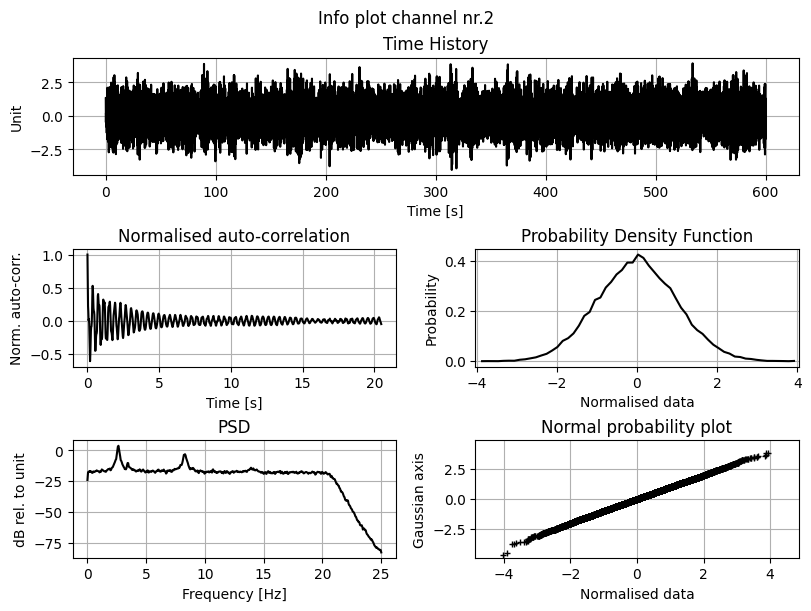

In [7]:
# import data files
set1 = np.load("../src/pyoma2/test_data/3SL/set1.npy", allow_pickle=True)
set2 = np.load("../src/pyoma2/test_data/3SL/set2.npy", allow_pickle=True)
set3 = np.load("../src/pyoma2/test_data/3SL/set3.npy", allow_pickle=True)

# list of datasets and reference indices
data = [set1, set2, set3]
ref_ind = [[0, 1, 2], [0, 1, 2], [0, 1, 2]]

# Create multisetup
msp = MultiSetup_PreGER(fs=100, ref_ind=ref_ind, datasets=data)

# decimate data
msp.decimate_data(q=2)

# Plot TH, PSD and KDE of the (selected) channels of the (selected) datasets
_, _ = msp.plot_ch_info(data_idx=[1], ch_idx=[2])

Again if we want to be able to plot the mode shapes later, then we need to define the geometry of the structure. 

In [8]:
# Geometry 1
_geo1 = "../src/pyoma2/test_data/3SL/Geo1.xlsx"
# Geometry 2
_geo2 = "../src/pyoma2/test_data/3SL/Geo2.xlsx"

# Define geometry1
msp.def_geo1_by_file(_geo1)
# Define geometry 2
msp.def_geo2_by_file(_geo2)

Now we need to instantiate the multi-setup versions of the algorithms we wish to execute, such as SSIdat.

2024-09-09 00:39:30,390 - pyoma2.setup.base - INFO - Running SSIdat... (base:128)
100%|██████████| 81/81 [00:00<00:00, 3468.24it/s]
2024-09-09 00:39:36,897 - pyoma2.functions.ssi - INFO - Calculating modal parameters... (ssi:502)
100%|██████████| 80/80 [00:00<00:00, 363.27it/s]
2024-09-09 00:39:38,091 - pyoma2.setup.base - INFO - all done (base:107)


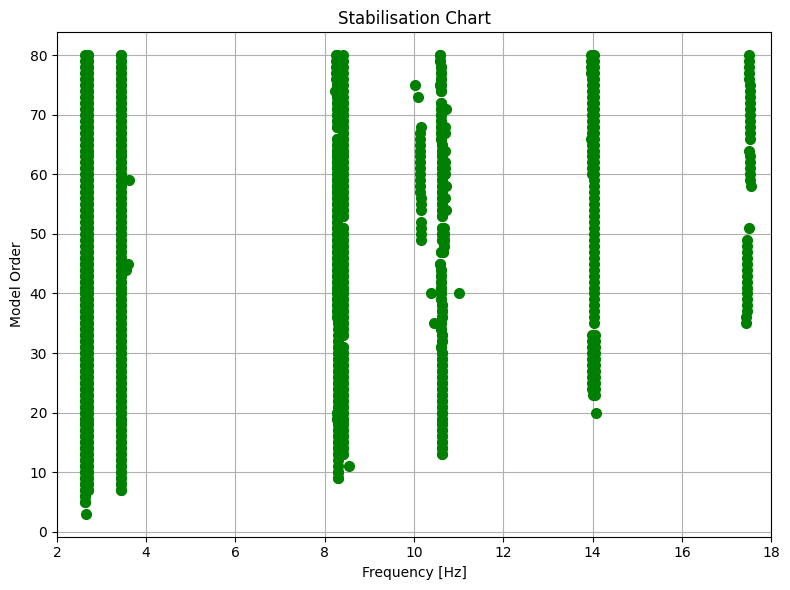

In [9]:
# Initialise the algorithms
ssidat = SSIdat_MS(name="SSIdat", br=80, ordmax=80)

# Add algorithms to the class
msp.add_algorithms(ssidat)
msp.run_all()

# Plot
_, _ = ssidat.plot_stab(freqlim=(2,18))

After the algorithms have been executed we can exctract the desired poles and plot the mode shapes.

2024-09-09 00:39:38,362 - pyoma2.setup.base - INFO - Getting mpe modal parameters from SSIdat (base:154)
2024-09-09 00:39:38,362 - pyoma2.functions.ssi - INFO - Extracting SSI modal parameters (ssi:825)
100%|██████████| 9/9 [00:00<00:00, 1925.17it/s]


Widget(value='<iframe src="http://localhost:57273/index.html?ui=P_0x1cde21272c0_0&reconnect=auto" class="pyvis…

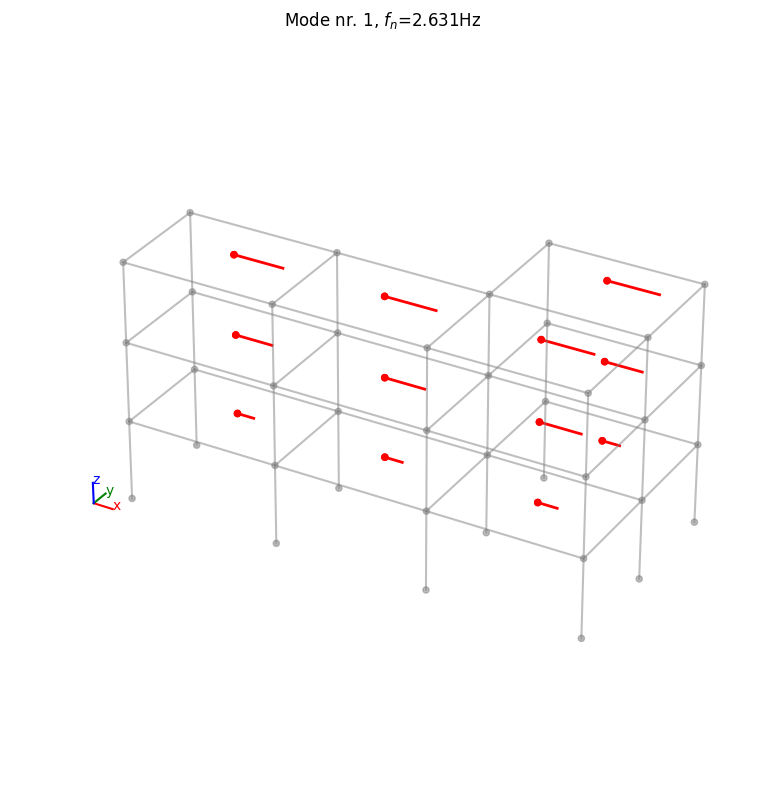

In [10]:
# get modal parameters
msp.mpe(
    "SSIdat",
    sel_freq=[2.63, 2.69, 3.43, 8.29, 8.42, 10.62, 14.00, 14.09, 17.57],
    order=80)

# plot mode shapes
_, _ = msp.plot_mode_geo1(algo_res=ssidat.result, mode_nr=1, view="3D", scaleF=2)
_ = msp.plot_mode_geo2(algo_res=ssidat.result, mode_nr=6, scaleF=2, notebook=True)

In [11]:
ssidat.result.Fn

array([ 2.63102473,  2.69617968,  3.42605687,  8.27997956,  8.41882261,
       10.59171709, 13.96998337, 14.03397164, 17.49790384])